In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.0f}'.format

In [158]:
df_c = pd.read_csv('HRDataset_v14.csv')
df = df_c.copy()
df.head()
#veri seti kaynak :/kaggle/input/human-resources-data-set/HRDataset_v14.csv

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22,LinkedIn,Exceeds,5,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4,Indeed,Fully Meets,5,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20,LinkedIn,Fully Meets,3,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16,Indeed,Fully Meets,5,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39,Google Search,Fully Meets,5,4,0,2/1/2016,0,2


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [160]:
df.columns = df.columns.str.strip()
#sütun adları arasındaki gereksiz boşluklar ortadan kaldıralım

In [161]:
df.isnull().sum()
# "DateofTermination" işten ayrılış tarihi boş gelmesi normal bir durumdur.

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [163]:
df = df.fillna(0)
#nan'ları 0 ile değiştirelim

In [164]:
# Organizasyon içindeki çalışanların cinsiyet dağılımlarını inceleyelim (Aktif + Pasif)
df["Sex"].value_counts()


F     176
M     135
Name: Sex, dtype: int64

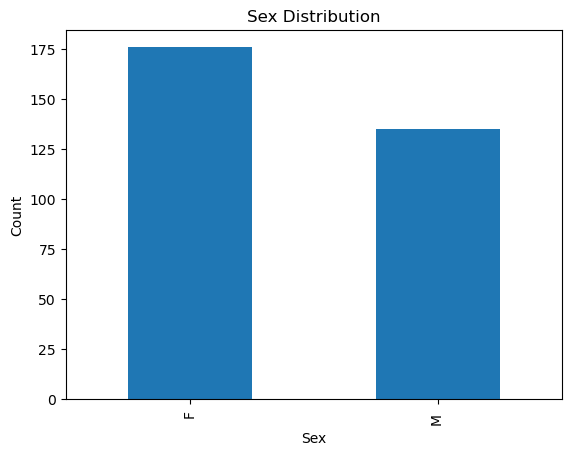

In [165]:
#Görselleştirelim
df["Sex"].value_counts().plot(kind="bar")
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [166]:
grouped = df.groupby('Sex')['EmploymentStatus'].apply(lambda x: x.eq('Active').sum()).reset_index(name='ActiveCount')
print(grouped)


  Sex  ActiveCount
0   F          116
1  M            91


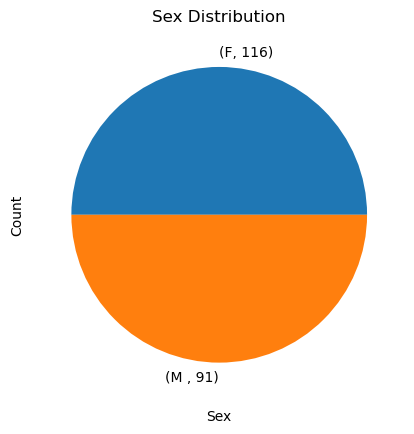

In [167]:
grouped.value_counts().plot(kind="pie")
plt.title("Sex Distribution")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [184]:
df_gender = df.groupby(['Department', 'Sex'])['Sex'].count().unstack()
df_gender = df_gender.fillna(0)
df_gender

Sex,F,M
Department,,
Admin Offices,6,3
Executive Office,1,0
IT/IS,22,28
Production,126,83
Sales,15,16
Software Engineering,6,5


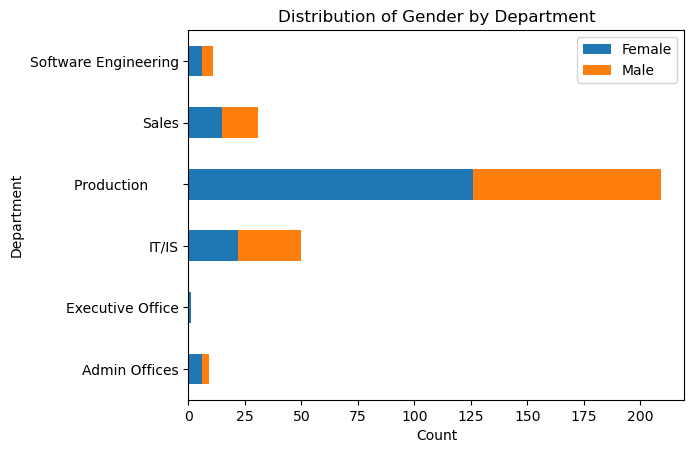

In [170]:
df_gender.plot(kind="barh", stacked=True)
plt.title("Distribution of Gender by Department")
plt.ylabel("Department")
plt.xlabel("Count")
plt.legend(["Female", "Male"])
plt.show()

In [185]:
#Visualizing diversity in each department
groupra = df.groupby(['Department', 'RaceDesc'])['Employee_Name'].count().unstack()
groupra = groupra.fillna(0)
groupra


RaceDesc,American Indian or Alaska Native,Asian,Black or African American,Hispanic,Two or more races,White
Department,,,,,,
Admin Offices,0,0,5,0,0,4
Executive Office,0,0,0,0,0,1
IT/IS,0,6,15,0,0,29
Production,2,21,45,1,6,134
Sales,1,1,10,0,5,14
Software Engineering,0,1,5,0,0,5


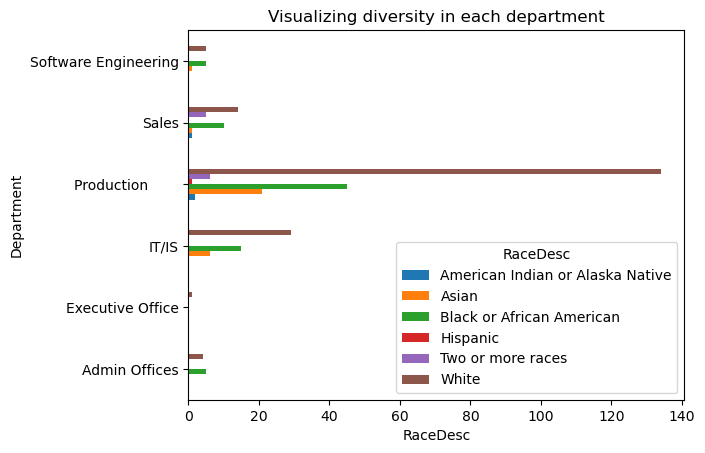

In [186]:
groupra.plot(kind="barh")
plt.title("Visualizing diversity in each department")
plt.ylabel("Department")
plt.xlabel("RaceDesc")
plt.show()

In [173]:
#Visualizing employee performance score by department
groupper = df.groupby(['Department', 'PerformanceScore'])['PerformanceScore'].count().unstack()

groupper = groupper.fillna(0)
groupper

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
Department,,,,
Admin Offices,0,9,0,0
Executive Office,0,1,0,0
IT/IS,6,42,1,1
Production,27,159,15,8
Sales,2,24,1,4
Software Engineering,2,8,1,0


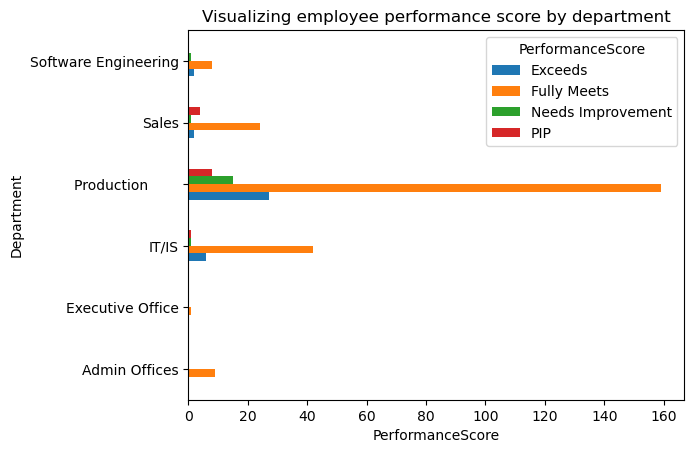

In [174]:
groupper.plot(kind="barh")
plt.title("Visualizing employee performance score by department")
plt.ylabel("Department")
plt.xlabel("PerformanceScore")
plt.show()

In [175]:
#Visualizing average salary by department and gender
avg_sal = df.groupby(['Department', 'Sex'])['Salary'].mean()
avg_sal

Department            Sex
Admin Offices         F      70926
                      M      73523
Executive Office      F     250000
IT/IS                 F      94593
                      M      99007
Production            F      59620
                      M      60459
Sales                 F      72017
                      M      66291
Software Engineering  F      96906
                      M      92689
Name: Salary, dtype: float64

<Figure size 1000x600 with 0 Axes>

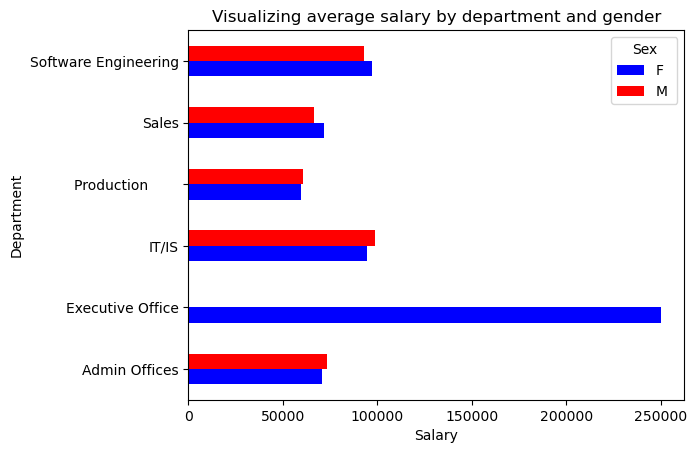

In [176]:
# Grafik boyutlarını belirle
plt.figure(figsize=(10, 6))

avg_sal.unstack().plot(kind='barh', color=['blue', 'red'])
plt.title("Visualizing average salary by department and gender")
plt.ylabel("Department")
plt.xlabel("Salary")

plt.show()

In [177]:
#Visualizing workforce recruuitment source
recruited_count = df.groupby('RecruitmentSource').size().reset_index(name = 'count').sort_values(by = 'count',ascending = False)
recruited_count 

,RecruitmentSource,count
4,Indeed,87
5,LinkedIn,76
3,Google Search,49
2,Employee Referral,31
1,Diversity Job Fair,29
0,CareerBuilder,23
8,Website,13
7,Other,2
6,On-line Web application,1


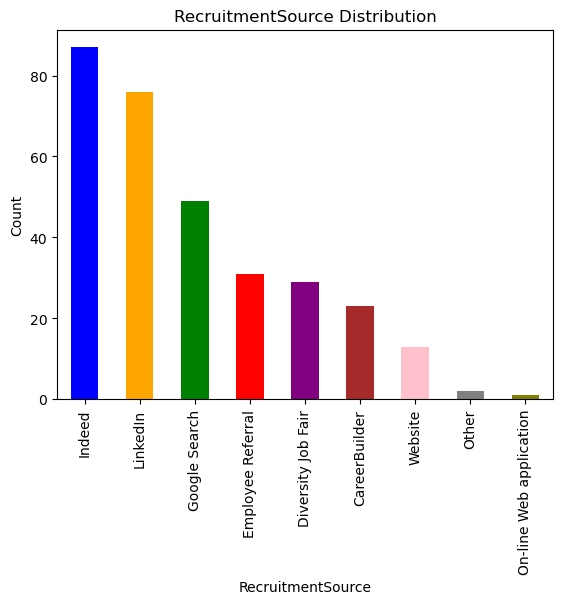

In [178]:
#Görselleştirelim
#departmanlar için  renk dağılımı yaratalım
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']

df["RecruitmentSource"].value_counts().plot(kind="bar",color=colors)
plt.title("RecruitmentSource Distribution")
plt.xlabel("RecruitmentSource")
plt.ylabel("Count")
plt.show()

In [194]:
#Visualizing average employee satisfacetion score by each department
avg_sat = df.groupby('Department')['EmpSatisfaction'].mean().reset_index().sort_values(by = 'EmpSatisfaction', ascending = False)

pd.options.display.float_format = '{:.1f}'.format # burdan sonra virgülden sonraki 1. basamağıda görmek istiyorum
avg_sat


,Department,EmpSatisfaction
5,Software Engineering,4.1
4,Sales,4.0
2,IT/IS,4.0
3,Production,3.9
0,Admin Offices,3.6
1,Executive Office,3.0


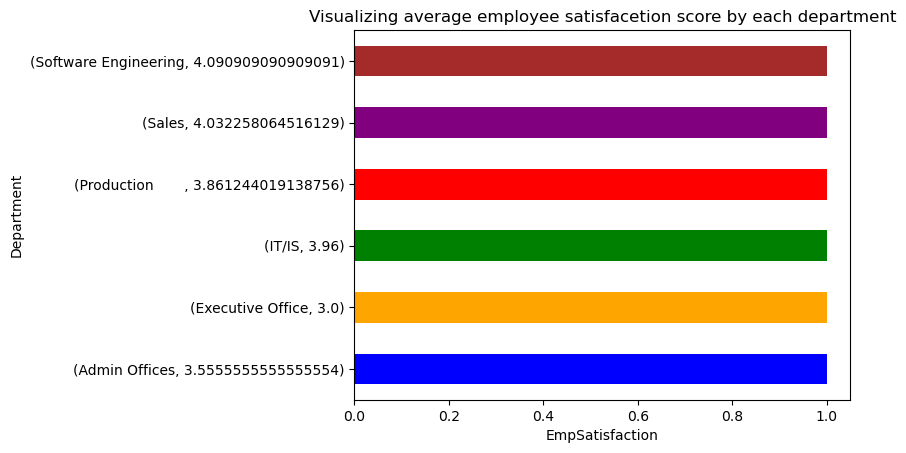

In [195]:
avg_sat.value_counts().plot(kind="barh",color=colors)
plt.title("Visualizing average employee satisfacetion score by each department")
plt.xlabel("EmpSatisfaction")
plt.ylabel("Department")
plt.show()

In [196]:

df_relation = df[['MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Sex', 'ManagerID', 
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30',
       'Absences']]

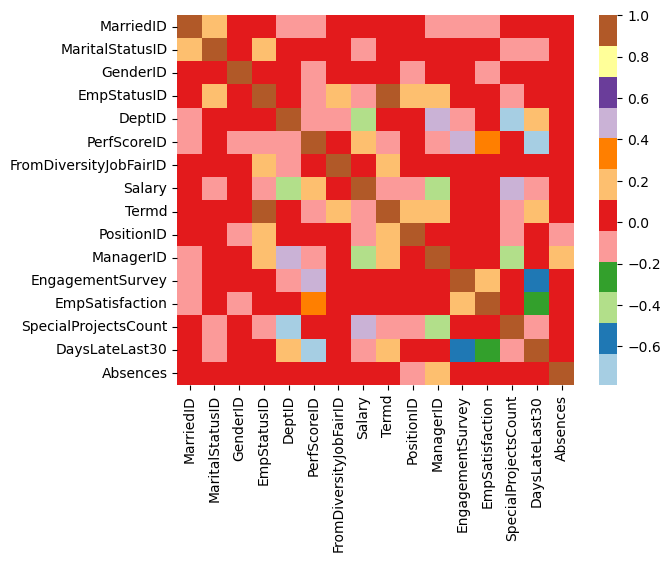

In [197]:

# Korelasyon matrisi hesapla
corr_matrix = df_relation.corr()

# Korelasyon matrisi görselleştir
sns.heatmap(corr_matrix, annot=False, cmap='Paired')

# Grafiği göster
plt.show()

- Korelasyon analizi, değişkenler arasındaki ilişkinin doğasını, yönünü ve gücünü ölçen bir yöntemdir. Korelasyon katsayısı, değişkenler arasındaki doğrusal ilişkiyi ölçer ve -1 ile +1 arasında bir değer alır.

- Korelasyon katsayısı 1'e yaklaştıkça, değişkenler arasındaki ilişki o kadar güçlü olur ve doğru orantılıdır. Yani, bir değişken artarken diğeri de artar.

- Korelasyon katsayısı -1'e yaklaştıkça, değişkenler arasındaki ilişki yine güçlü olur ancak ters orantılıdır. Yani, bir değişken artarken diğeri azalır.

- Korelasyon katsayısı 0'a yaklaştıkça, değişkenler arasındaki ilişki zayıflar ve ilişki yok hale gelir.

- Dolayısıyla, korelasyon katsayısı ne kadar yüksekse, değişkenler arasındaki ilişki o kadar fazla ve güçlüdür.